# C++: Image Edge Detector Filter (Convolution 2D)
<p align="left">
<img src="./img/businesscard.jpg" width="500px" alt="Business Card" align="left" >
</p>
<br>

[www.rptecnologias.com](http://www.rptecnologias.com)
<br>
guitars.ai@rptecnologias.com


In [1]:
// Load Libraries
#pragma cling add_library_path("/usr/lib/x86_64-linux-gnu/")
#pragma cling add_include_path("/usr/local/include/")
#pragma cling add_include_path("/usr/local/include/opencv4")
#pragma cling load("/usr/lib/x86_64-linux-gnu/libopencv_core.so.3.2.0")
#pragma cling load("/usr/lib/x86_64-linux-gnu/libopencv_imgcodecs.so.3.2.0")
#pragma cling load("/usr/lib/x86_64-linux-gnu/libopencv_imgproc.so.3.2.0")
#pragma cling load("./Cpp/libconvolution.so")

In [2]:
// Includes
#include <string>
#include <cstring>
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <opencv2/highgui.hpp>
#include <opencv2/imgproc.hpp>
#include <opencv2/imgcodecs.hpp>
#include <iostream>
#include <vector>
#include<algorithm>
#include <fstream>
#include "xtl/xbase64.hpp"
#include "nlohmann/json.hpp"
#include "./Cpp/convolution.hpp"

typedef std::vector<std::vector<double>> matrix;

using namespace std;

In [3]:
// Load Image
using namespace cv;
Mat image;
image = imread("./img/guitar.jpg" , IMREAD_UNCHANGED );

In [4]:
// Edge Detection Kernel
matrix kernel = {{-1,-1,-1},{-1,8,-1}, {-1,-1,-1}};

In [5]:
// Define a Class to Hold RGB std::vector<std::vector<double>>
class RGB2D 
{
    public:
        matrix r;
        matrix g;
        matrix b;
        RGB2D(int h=0, int w=0)
        {
            r=matrix(h, std::vector<double>(w,0.0));
            g=matrix(h, std::vector<double>(w,0.0));
            b=matrix(h, std::vector<double>(w,0.0));
        }
        
        //Method to set R
        void setR(matrix &m)
        {
            r=m;
        }
        
        //Method to set G
        void setG(matrix &m)
        {
            g=m;
        }
        
        //Method to set B
        void setB(matrix &m)
        {
            b=m;
        }
        
        // Method to set RGB
        //Method to set R
        void setRGB(matrix &m, matrix &n, matrix &o)
        {
            r=m;
            g=n;
            b=o;
        }
        
       //Method to Flatten a 2D Matrix
        std::vector<double> flatten(matrix &m)
        {
            std::vector<double> result;
            for(auto mh = m.begin(); mh != m.end();mh++)
            {    
                for(auto mw = mh->begin(); mw != mh->end();mw++)
                    {
                        result.push_back((*mw));
                    }
            }
            return result;
        }
        
        // Method to Normalize Vectors
        void normalizeVec(std::vector<double> &v)
        {
            double max = *std::max_element(v.begin(), v.end());
            double min = *std::min_element(v.begin(),v.end());
            
            for (int i = 0; i < v.size();i++)
            {
                if((max-min) !=0)
                {v[i]=(int)std::round(255*((v[i]-min)/(max-min)));}
                else{v[i]=255;}
            }
        }
        
        // Method to convert Flatten  Vector back to 2D Matrix
        matrix VecTo2D(std::vector<double> &v, int h, int w)
        {
            matrix result(h, std::vector<double>(w,0.0));
            int index=0;
            int n=0;
            for (auto it = v.begin(); it != v.end();it++)
            {
                result[index][n] = *it;
                n++;
                if(n%w==0 && n!=0)
                    {
                        n=0;
                        index++;
                    }
            }
            return result;
        }
        
        //Method to Convert to Black&White
        void convertToBW()
        {
            for (int i=0; i<r.size(); i++)
            {
                for (int j=0; j<r[0].size(); j++)
                {
                        int avg = (int)std::round((b[i][j]+r[i][j]+g[i][j])/3.0);
                        b[i][j] = ( avg < 128 ) ? 0 : 255;
                        g[i][j] = ( avg < 128 ) ? 0 : 255;
                        r[i][j] = ( avg < 128 ) ? 0 : 255;  
                }
            }
        }
        
        //Method to Normalize RGBD2D
        void normalizeRGB2D()
        {
            //Flatten
            std::vector<double> flattenR = flatten(r);
            std::vector<double> flattenG = flatten(g);
            std::vector<double> flattenB = flatten(b);
            //Normalize
            normalizeVec(flattenR);
            normalizeVec(flattenG);
            normalizeVec(flattenB);
            //Back to 2D
            r = VecTo2D(flattenR,r.size(),r[0].size());
            g = VecTo2D(flattenG,g.size(),g[0].size());
            b = VecTo2D(flattenB,b.size(),b[0].size());
            
        }
        
        // Method to Convert RGB2D to OpenCV Mat
        cv::Mat RGB2DtoMat()
        {
            cv::Mat result(r.size(), r[0].size(), CV_8UC3);
            
            for (int i=0; i<result.rows; i++)
            {
                for (int j=0; j<result.cols; j++)
                {
                        result.at<Vec3b>(i,j)[0] = b[i][j];
                        result.at<Vec3b>(i,j)[1] = g[i][j];
                        result.at<Vec3b>(i,j)[2] = r[i][j];            
                }
            }
            return result;
        }
       
};

In [6]:
// Define a function to convert OpenCV MAT to std::vector<std::vector<double>>
RGB2D convertTo2D(Mat image)
{
    RGB2D image2D(image.rows, image.cols);
    for (int i=0; i < image.rows; ++i)
    {
        for (int j=0; j < image.cols; ++j)
        {
            Vec3b intensity = image.at<Vec3b>(i, j);
            uchar blue = intensity.val[0];
            uchar green = intensity.val[1];
            uchar red = intensity.val[2];
            image2D.r[i][j] = (int)red;
            image2D.b[i][j] = (int)blue;
            image2D.g[i][j] = (int)red;
        }
    }
    return image2D;
}

In [7]:
// Convert OpenCV Mat to RGB2D Object
RGB2D image2D=convertTo2D(image);

In [8]:
// Convolve 2D Arrays with Kernel 
matrix convR=Convolution2D(image2D.r,kernel);
matrix convG=Convolution2D(image2D.g,kernel);
matrix convB=Convolution2D(image2D.b,kernel);

In [9]:
// Replace RGB Matrices to Convolved Matrices
image2D.setRGB(convR,convG,convB);
//Normalize RGB 2D Image
image2D.normalizeRGB2D();
// Convert to Black and White
image2D.convertToBW();

In [10]:
// Convert RGB 2D Image back to OpenCV Mat
cv::Mat edgedetectBWImg = image2D.RGB2DtoMat();

In [11]:
// Save Edge Detected Image to File
cv::imwrite( "./img/guitarc++.jpg", edgedetectBWImg );

In [12]:
// Mechanism to Display Images inside Notebook
namespace im
{
    struct image
    {
        inline image(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);
            m_buffer << fin.rdbuf();
        }

        std::stringstream m_buffer;
    };

    nlohmann::json mime_bundle_repr(const image& i)
    {
        auto bundle = nlohmann::json::object();
        bundle["image/png"] = xtl::base64encode(i.m_buffer.str());
        return bundle;
    }
}

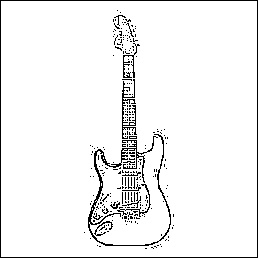

In [13]:
im::image output("./img/guitarc++.jpg");
output

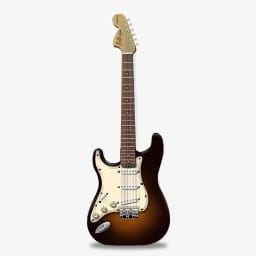

In [14]:
im::image original("./img/guitar.jpg");
original